In [1]:
import scipy.stats as s
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
alpha = 1
beta = 0.5

Use a simple linear regression model - is closed form, but imagine we cannot normalize. We want to find the posterior of the weights numerically. 

$P(w|t,X, \alpha, \beta) = P(t|w,\beta)P(w|\alpha) \ + \ const.$

$P(t|w,\beta) = N(t|\Phi w, \beta^{-1})$

$P(w|\alpha) = N(w|0, \alpha^{-1})$

In [3]:
X = np.random.random((20,1))*3
t = 2.5*X + np.random.normal(size=(20,1),loc=0,scale=0.2) #Generate our problem


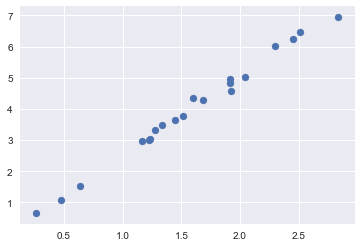

In [4]:
plt.scatter(X,t)

In [5]:
def likelihood(w):
    """As we only require proportionality, just use unnormalized distributions"""
    return np.exp((-1*beta/2)*(t-X.dot(w)).T.dot(t-X.dot(w)))

def prior(w):
    return np.exp((-1*alpha/2)*w**2)

In [6]:
likelihood(np.array(0.2, ndmin=2)) #test

array([[  1.41702836e-35]])

In [7]:
prior(np.array(0, ndmin=2)) #test

array([[ 1.]])

In [8]:
proposal = s.norm(0,0.5) #Our proposal distribution

def sample_step():
    """Sample from proposal distribution"""
    return proposal.ppf(np.random.random())

In [19]:
W = np.zeros(10000)
W[0] = 0.0 #initial guess for w

In [20]:
for i in range(9999):
    w_cand = np.array(W[i] + sample_step(),ndmin=2) #Candidate sample

    rho = min((likelihood(w_cand)*prior(w_cand))/(likelihood(W[i,None,None])*prior(W[i,None,None])),1)
    if np.random.uniform()<rho:
        #keep candidate
        W[i+1]=w_cand
    else:
        #discard, keep previous
        W[i+1]=W[i]

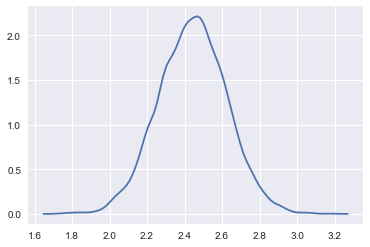

In [21]:
sns.kdeplot(W[200:]) #Plot the distribution of our samples

In [22]:
wMap=np.mean(W[200:]) #Our approximate MAP value for w
wMap

2.4418584104350014

In [23]:
#Analytic answer for the MAP
Sn = (alpha+beta*X.T.dot(X))**-1
mn = Sn*(beta*X.T.dot(t))
mn

array([[ 2.44510484]])

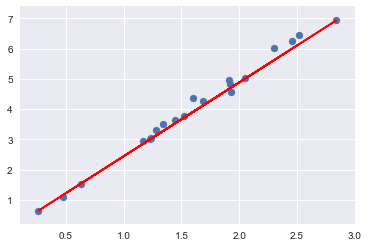

In [24]:
#Lets plot our Map estimate
plt.plot(X,X*wMap, c='r')
plt.scatter(X,t)